In [1]:
# Plotting imshow() plots using multiple index ranges for grid mesh of 100000 models (100 log, 5 dust, 200 ages)

In [1]:
from matplotlib.pyplot import *
import numpy as np
from prospectFunctions import *
import itertools
import astropy.units as u
import astropy.constants as const
import time
from tqdm import tqdm

start = time.time()

grid_ranges, run_params = getParams(100,5,200,dust=True)
a = 1.0 + run_params['zred']

logzs = grid_ranges['logzsol']
dusts = grid_ranges['dust2']
tages = grid_ranges['tage']

obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

end = time.time()
print(end-start)

13.324289083480835


In [2]:
dusts

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

In [3]:
data_grid_params = np.load('params_sps_100000.npy')
data_grid_spec = np.load('specs_sps_100000.npy')

In [4]:
break_strengths = {}

starts = np.linspace(3620, 3850, 231, dtype=int)

for start in starts:
    
    bounds = getBreakBounds(wspec, start, **run_params)
    
    blue_lower, blue_upper = bounds['blue'][0], bounds['blue'][1]
    red_lower, red_upper = bounds['red'][0], bounds['red'][1]
    
    data_grid_break = np.empty((len(logzs),len(dusts),len(tages),1))
    
    for i_logz,i_dust,i_tage in itertools.product(range(len(logzs)),range(len(dusts)),range(len(tages))):
        lower = data_grid_spec[i_logz,i_dust,i_tage,blue_lower:blue_upper].mean()
        upper = data_grid_spec[i_logz,i_dust,i_tage,red_lower:red_upper].mean()
    
        ratio = upper/lower
    
        data_grid_break[i_logz,i_dust,i_tage,:] = ratio
    
    break_strengths[f'data_grid_break_{start}'] = data_grid_break

In [7]:
# np.save('breaks_Anna_100000.npy', break_strengths['data_grid_break_3620'])
# np.save('breaks_D4000_100000.npy', break_strengths['data_grid_break_3850'])

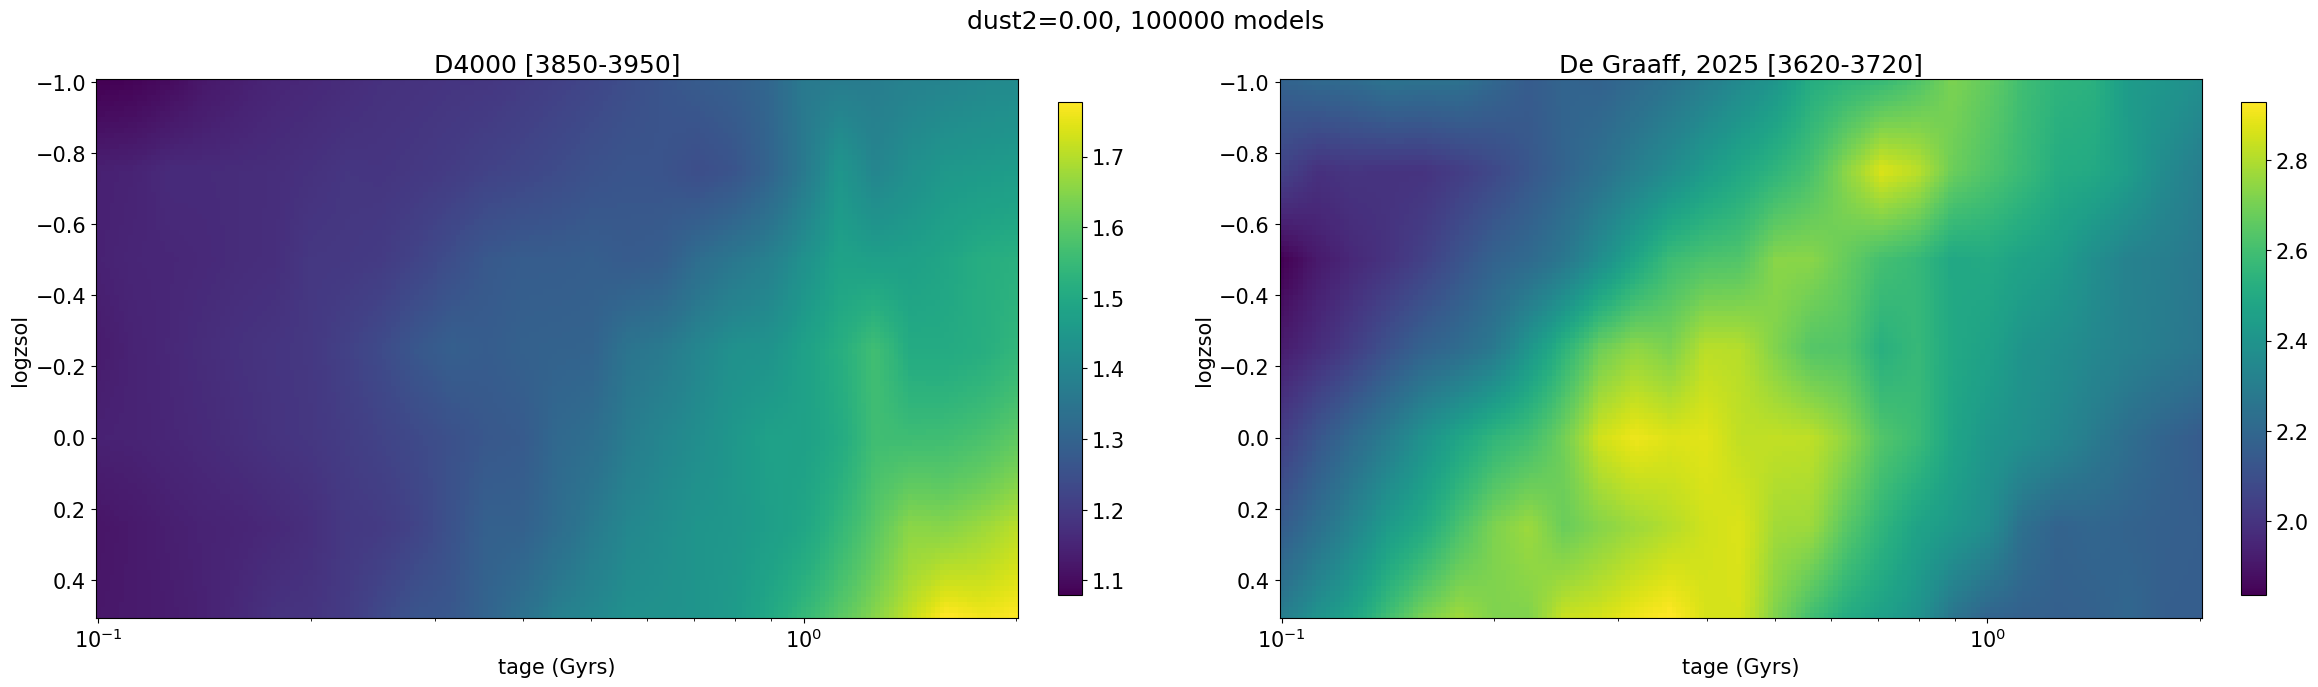

In [61]:
rcParams['font.size'] = 15

for i_dust in range(len(dusts[:1])):
    
    fig, [ax1, ax2] = subplots(1,2, figsize=(28,7))

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im1 = ax1.pcolormesh(X, Y, break_strengths['data_grid_break_3850'][:,i_dust,:,0], antialiased=False)
    ax1.set_xscale('log')
    ax1.invert_yaxis()
    fig.colorbar(im1, ax=ax1, fraction=0.025, pad=0.04)
    ax1.set_xlabel('tage (Gyrs)')
    ax1.set_ylabel('logzsol')

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im2 = ax2.pcolormesh(X, Y, break_strengths['data_grid_break_3620'][:,i_dust,:,0], antialiased=False)
    ax2.set_xscale('log')
    ax2.invert_yaxis()
    fig.colorbar(im2, ax=ax2, fraction=0.025, pad=0.04)
    ax2.set_xlabel('tage (Gyrs)')
    ax2.set_ylabel('logzsol')
    
    ax1.set_title('D4000 [3850-3950]')
    ax2.set_title('De Graaff, 2025 [3620-3720]')
    
    fig.suptitle(f'dust2={dusts[i_dust]:.2f}, 100000 models')

    # savefig(f'dust_{dusts[i_dust]}_age_vs_metallicity_100000.png')
    
    show()

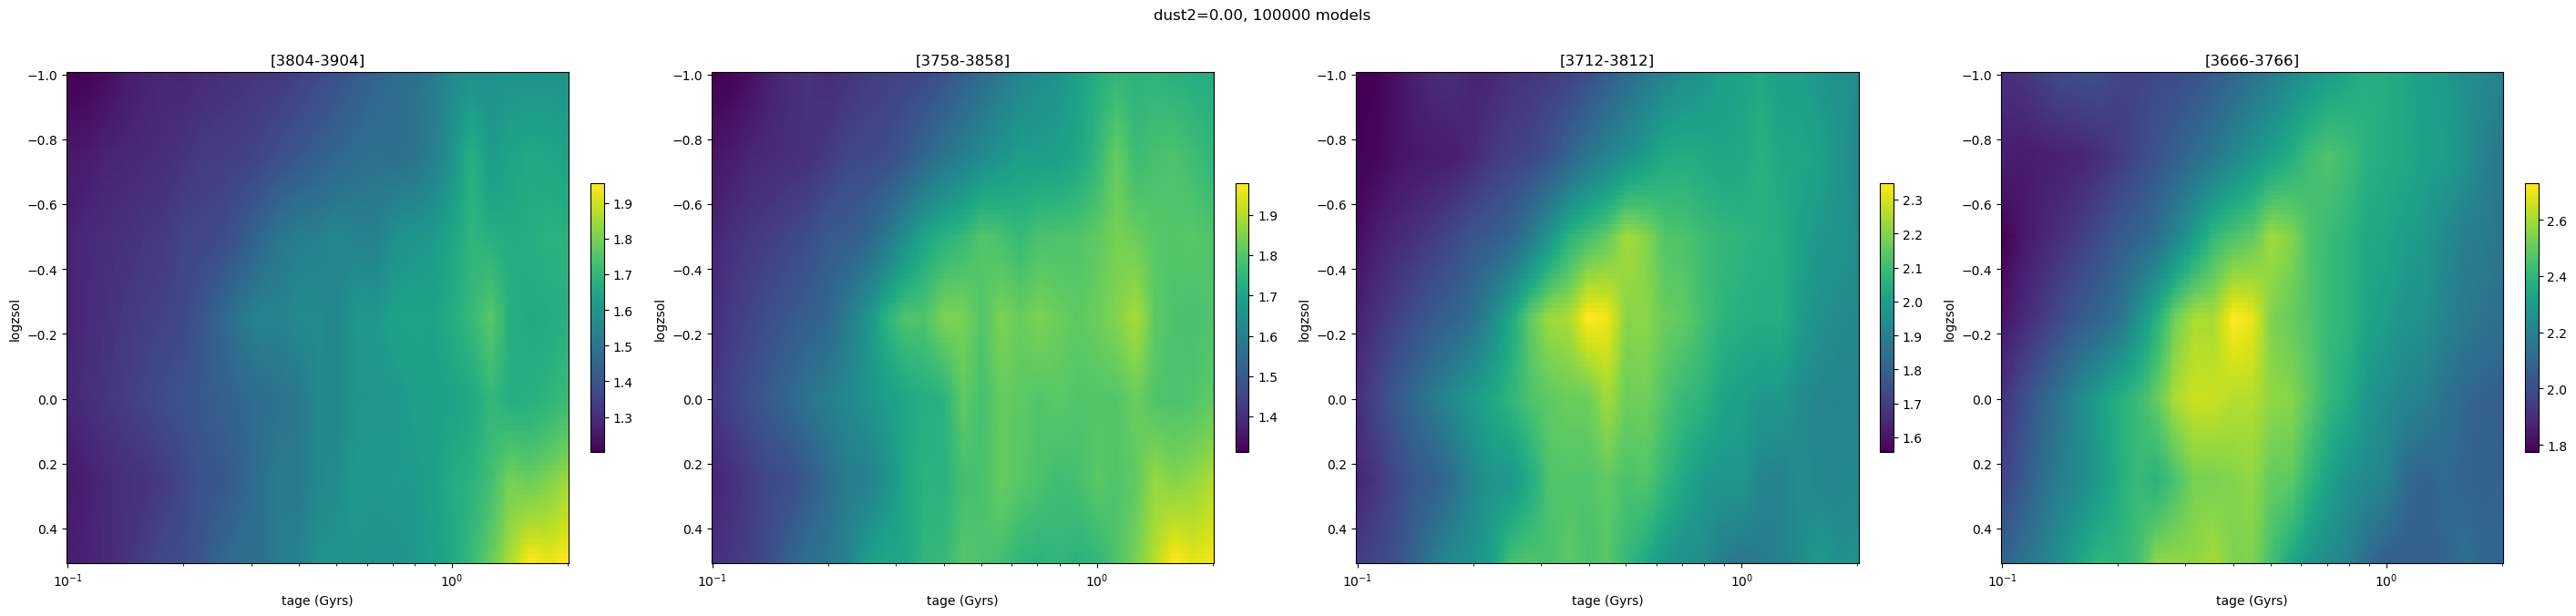

In [19]:
for i_dust in range(len(dusts[:1])):

    axes = [f'ax{num}' for num in range(1,5)]
    
    fig, [ax1, ax2, ax3, ax4] = subplots(4,4, figsize=(35,7))

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im1 = ax1.pcolormesh(X, Y, break_strengths['data_grid_break_3804'][:,i_dust,:,0], antialiased=False)
    ax1.set_xscale('log')
    ax1.invert_yaxis()
    fig.colorbar(im1, ax=ax1, fraction=0.025, pad=0.04)
    ax1.set_xlabel('tage (Gyrs)')
    ax1.set_ylabel('logzsol')

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im2 = ax2.pcolormesh(X, Y, break_strengths['data_grid_break_3758'][:,i_dust,:,0], antialiased=False)
    ax2.set_xscale('log')
    ax2.invert_yaxis()
    fig.colorbar(im2, ax=ax2, fraction=0.025, pad=0.04)
    ax2.set_xlabel('tage (Gyrs)')
    ax2.set_ylabel('logzsol')

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im3 = ax3.pcolormesh(X, Y, break_strengths['data_grid_break_3712'][:,i_dust,:,0], antialiased=False)
    ax3.set_xscale('log')
    ax3.invert_yaxis()
    fig.colorbar(im3, ax=ax3, fraction=0.025, pad=0.04)
    ax3.set_xlabel('tage (Gyrs)')
    ax3.set_ylabel('logzsol')

    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im4 = ax4.pcolormesh(X, Y, break_strengths['data_grid_break_3666'][:,i_dust,:,0], antialiased=False)
    ax4.set_xscale('log')
    ax4.invert_yaxis()
    fig.colorbar(im4, ax=ax4, fraction=0.025, pad=0.04)
    ax4.set_xlabel('tage (Gyrs)')
    ax4.set_ylabel('logzsol')

    ax1.set_title('[3804-3904]')
    ax2.set_title('[3758-3858]')
    ax3.set_title('[3712-3812]')
    ax4.set_title('[3666-3766]')
    
    fig.suptitle(f'dust2={dusts[i_dust]:.2f}, 100000 models')

    # savefig(f'dust_{dusts[i_dust]}_age_vs_metallicity_3804_3666.png')
    
    show()

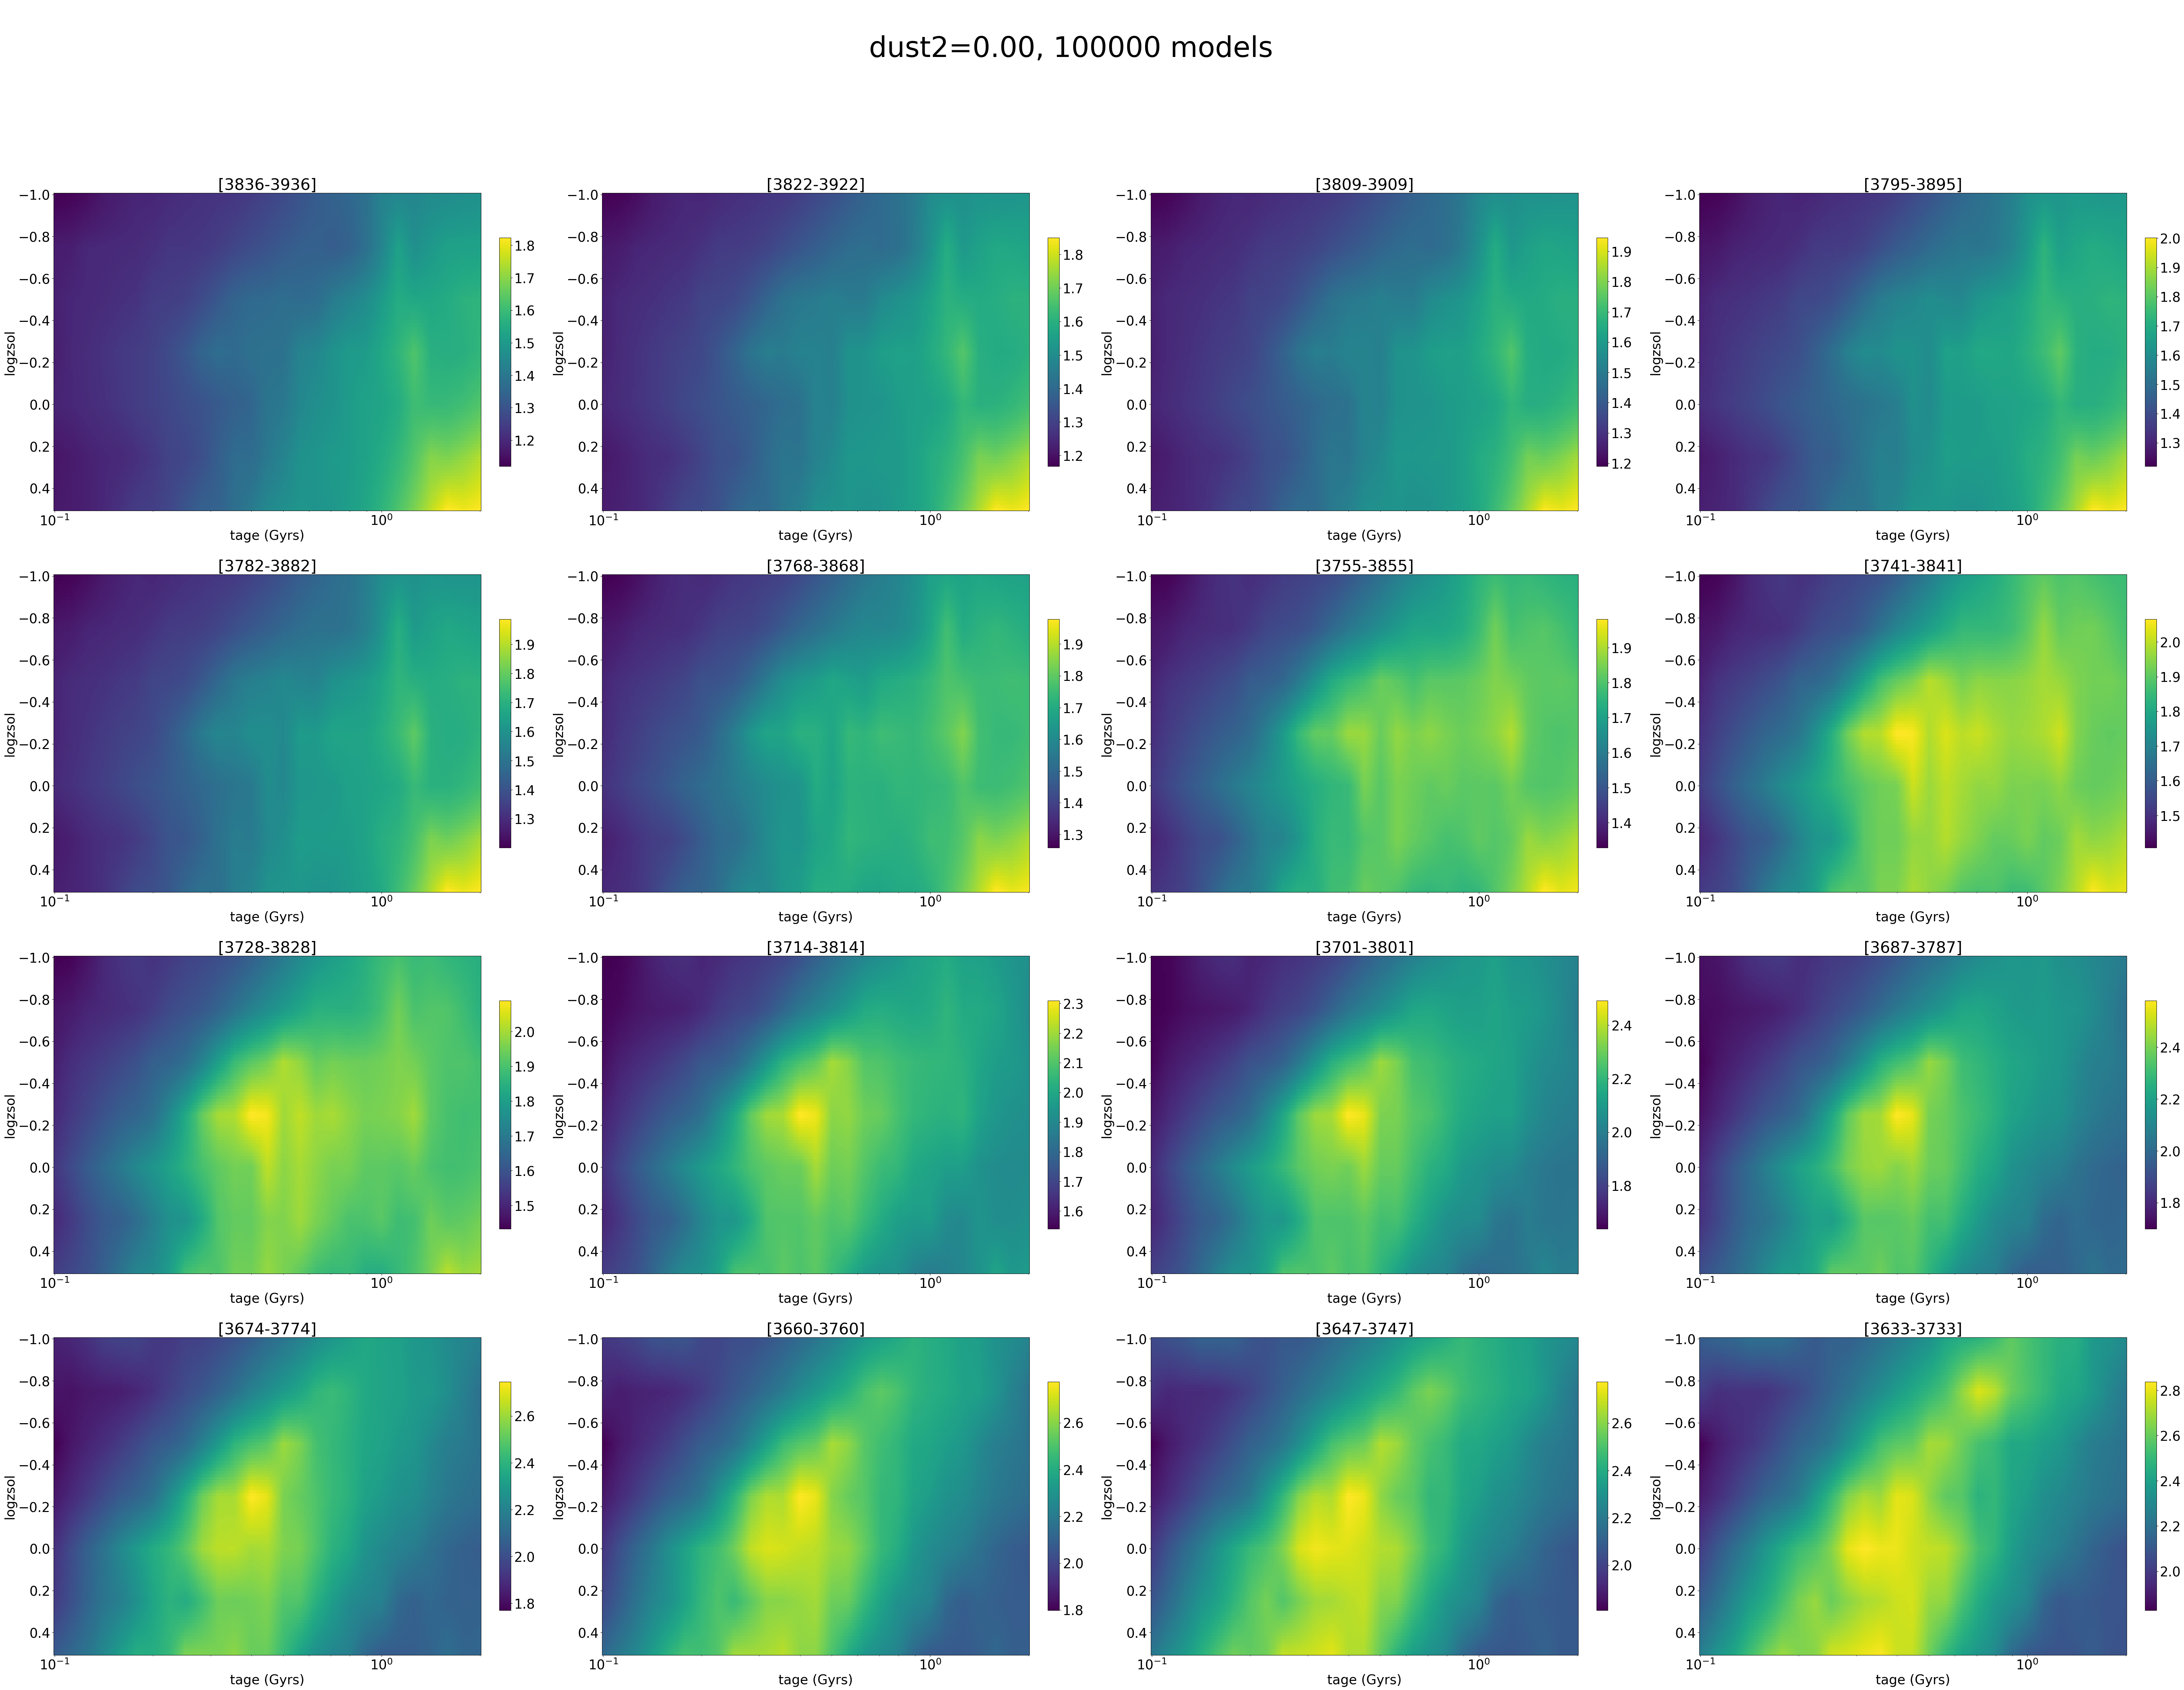

In [57]:
rcParams['font.size'] = 28
# figsize=(width,height)
fig, axs = subplots(nrows=4, ncols=4, figsize=(80,28*2))

starts = np.linspace(3850,3620,18,dtype=int)
starts = starts[1:-1]

for ax,start in zip(axs.flatten(),starts):
    
    X, Y = np.meshgrid(data_grid_params[0,0,:,4],  data_grid_params[:,0,0,2])
    im = ax.pcolormesh(X, Y, break_strengths[f'data_grid_break_{start}'][:,i_dust,:,0], antialiased=False)
    ax.set_xscale('log')
    ax.invert_yaxis()
    fig.colorbar(im, ax=ax, fraction=0.025, pad=0.04)
    ax.set_xlabel('tage (Gyrs)')
    ax.set_ylabel('logzsol')
    
    ax.set_title(f'[{start}-{start+100}]')
    
    fig.suptitle(f'\ndust2={dusts[i_dust]:.2f}, 100000 models', fontsize=60)

    # savefig('16_indices_tage_vs_logzsol.png')

show()

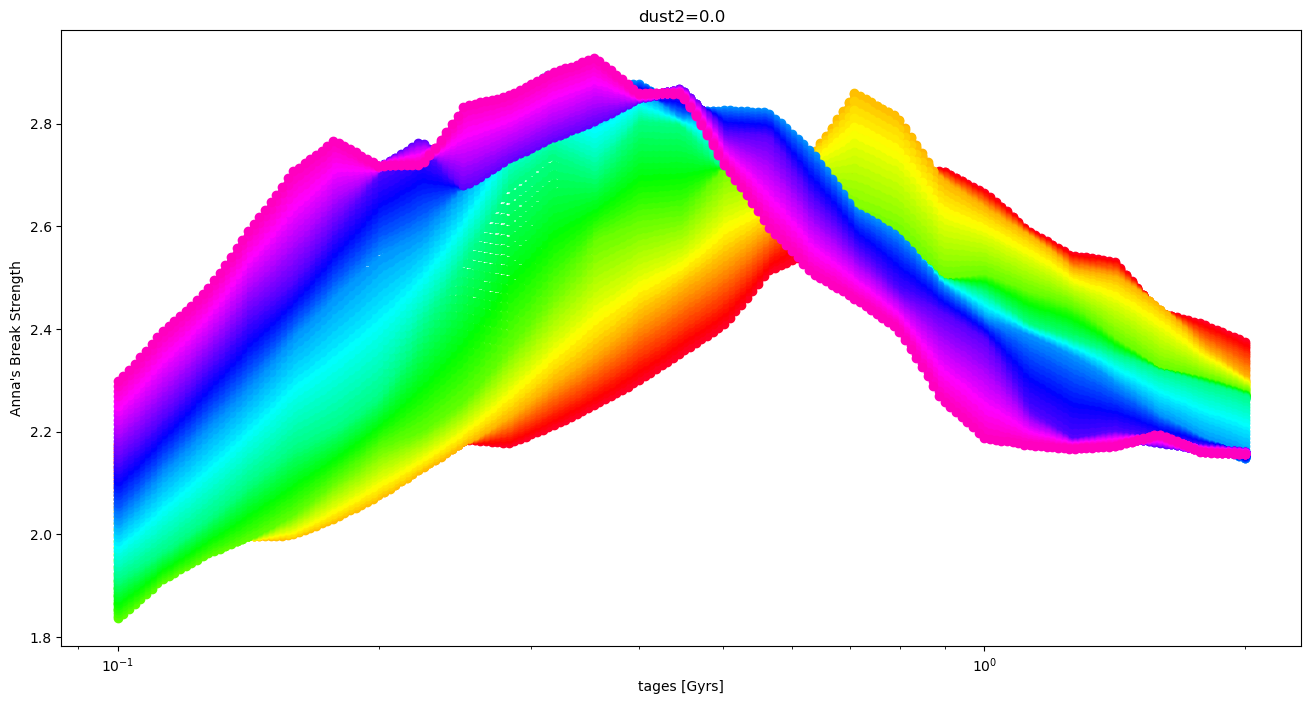

In [25]:
# scatter(data_grid_params[i_logz,i_dust,i_tage,4], break_strengths['data_grid_break_3620'][i_logz,i_dust,i_tage,:],

i_dust = 0
color = cm.gist_rainbow(np.linspace(0, 1, len(logzs)))

figure(figsize=(16,8))

for i_logz in range(len(logzs)):

    maxi = break_strengths['data_grid_break_3620'][i_logz,i_dust,:,0].max()
    index_of_max = list(break_strengths['data_grid_break_3620'][i_logz,i_dust,:,0]).index(maxi)
    
    plot(grid_ranges['tage'], break_strengths['data_grid_break_3620'][i_logz,i_dust,:,0], '-o', color=color[i_logz], label=f'logzsol={logzs[i_logz]:.2f}, max={maxi:.3f} at tage={tages[index_of_max]:.3f}')

xscale('log')

# legend(fontsize=9)

title_text = f'dust2={dusts[i_dust]}'
title(title_text)

xlabel('tages [Gyrs]')
ylabel("Anna's Break Strength")

# savefig('D4000_Break_strength_vs_tage_10.png')

show()

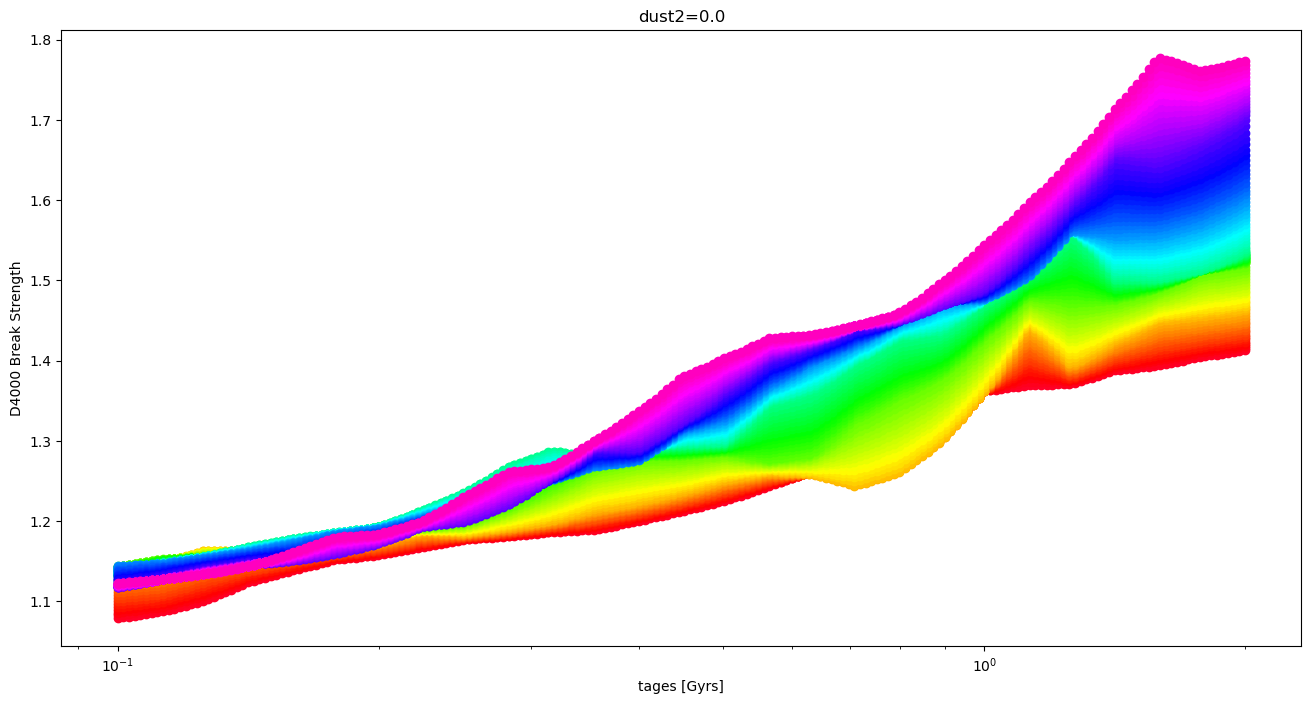

In [24]:
i_dust = 0
color = cm.gist_rainbow(np.linspace(0, 1, len(logzs)))

figure(figsize=(16,8))

for i_logz in range(len(logzs)):

    maxi = break_strengths['data_grid_break_3850'][i_logz,i_dust,:,0].max()
    index_of_max = list(break_strengths['data_grid_break_3850'][i_logz,i_dust,:,0]).index(maxi)
    
    plot(grid_ranges['tage'], break_strengths['data_grid_break_3850'][i_logz,i_dust,:,0], '-o', color=color[i_logz], label=f'logzsol={logzs[i_logz]:.2f}, max={maxi:.3f} at tage={tages[index_of_max]:.3f}')

xscale('log')

# legend(fontsize=9)

title_text = f'dust2={dusts[i_dust]}'
title(title_text)

xlabel('tages [Gyrs]')
ylabel('D4000 Break Strength')

# savefig('D4000_Break_strength_vs_tage_10.png')

show()